In [354]:
import pandas as pd
import seaborn as sns
import numpy as np
import collections
%matplotlib inline

In [367]:
#Читаем логи

df_all = {}
#df_all['screen448_off'] = pd.read_csv("./mobile/LOAD-448/screen_off.log", delimiter=" ", names="ts curr".split())
df_all['screen448_on'] = pd.read_csv("./mobile/LOAD-448/screen_on.log", delimiter=" ", names="ts curr".split())
#df_all['screen447_off'] = pd.read_csv("./mobile/iOs/screen_off.log", delimiter=" ", names="ts curr".split())
df_all['scree447_on'] = pd.read_csv("./mobile/iOs/screen_on.log", delimiter=" ", names="ts curr".split())


#suffix = 'active'
suffix = ''

#Сортируем словарик так, чтобы результаты в графике были в правильном порядке
#добавляем каждому датафрейму "label" и суффикс, указанный выше.
df_sorted = collections.OrderedDict(sorted(df_all.items()))

for key, value in df_sorted.items():
    value['label'] = "{key}_{suff}".format(
        key=key,
        suff=suffix
    )
    value.dropna()

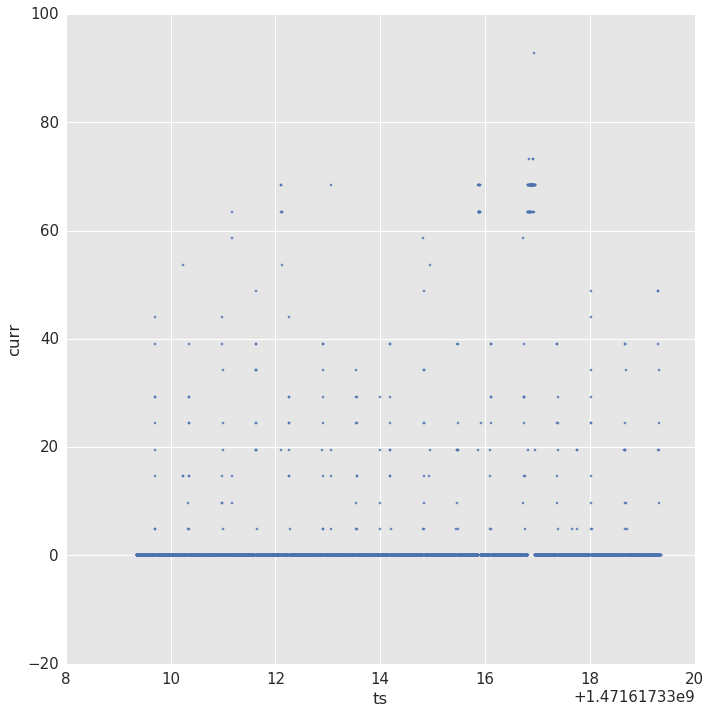

In [353]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


sns.lmplot('ts', 'curr', 
           data=df_all['01~screen_off'][:5000], 
           fit_reg=False, 
           scatter_kws={"marker": "D", 
                        "s": 7},
          size=10)
sns.set(font_scale=1.5)

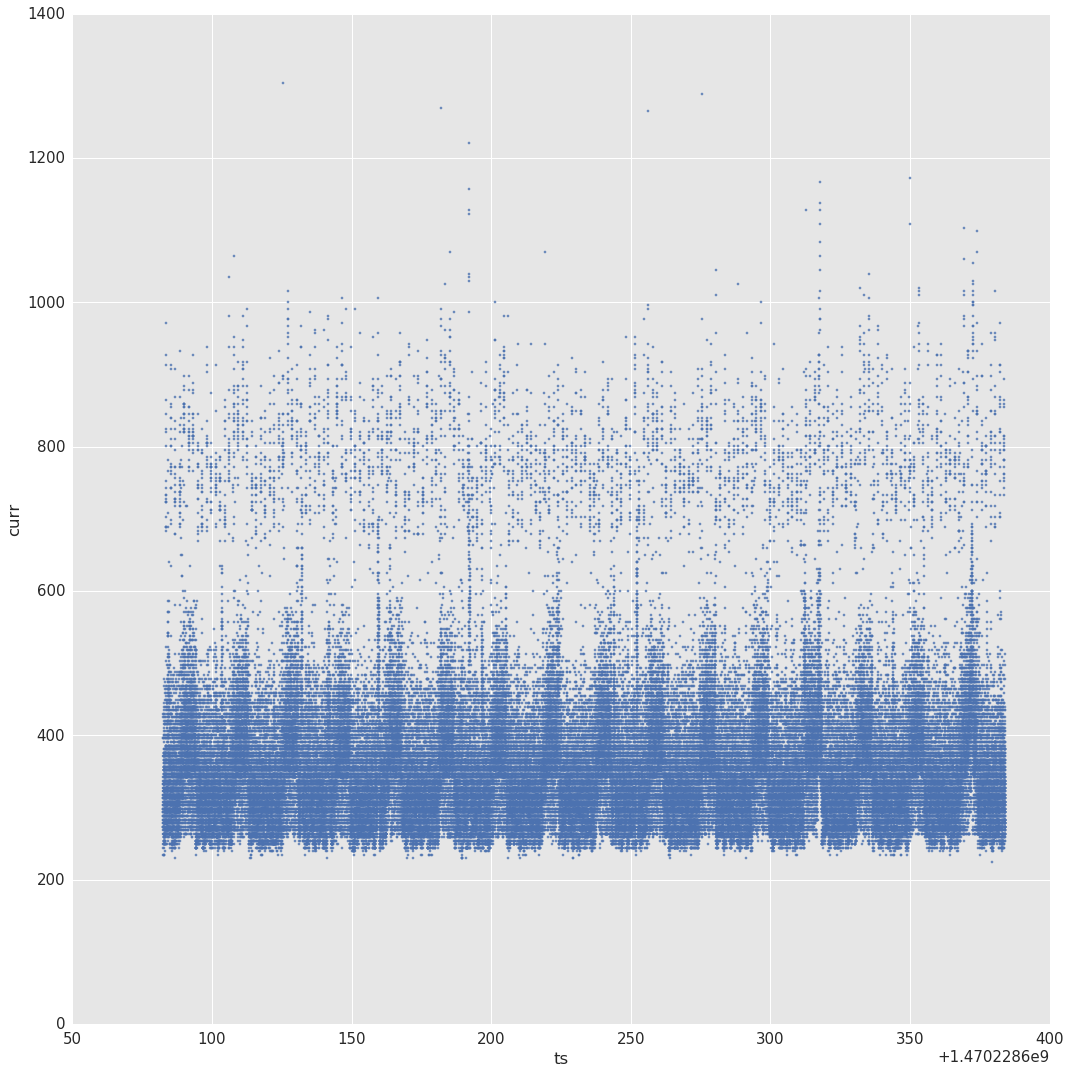

In [81]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


sns.lmplot('ts', 'curr', 
           data=df_yandexnavi_203_76_on, 
           fit_reg=False, 
           scatter_kws={"marker": "D", 
                        "s": 7},
          size=15)
sns.set(font_scale=1.5)

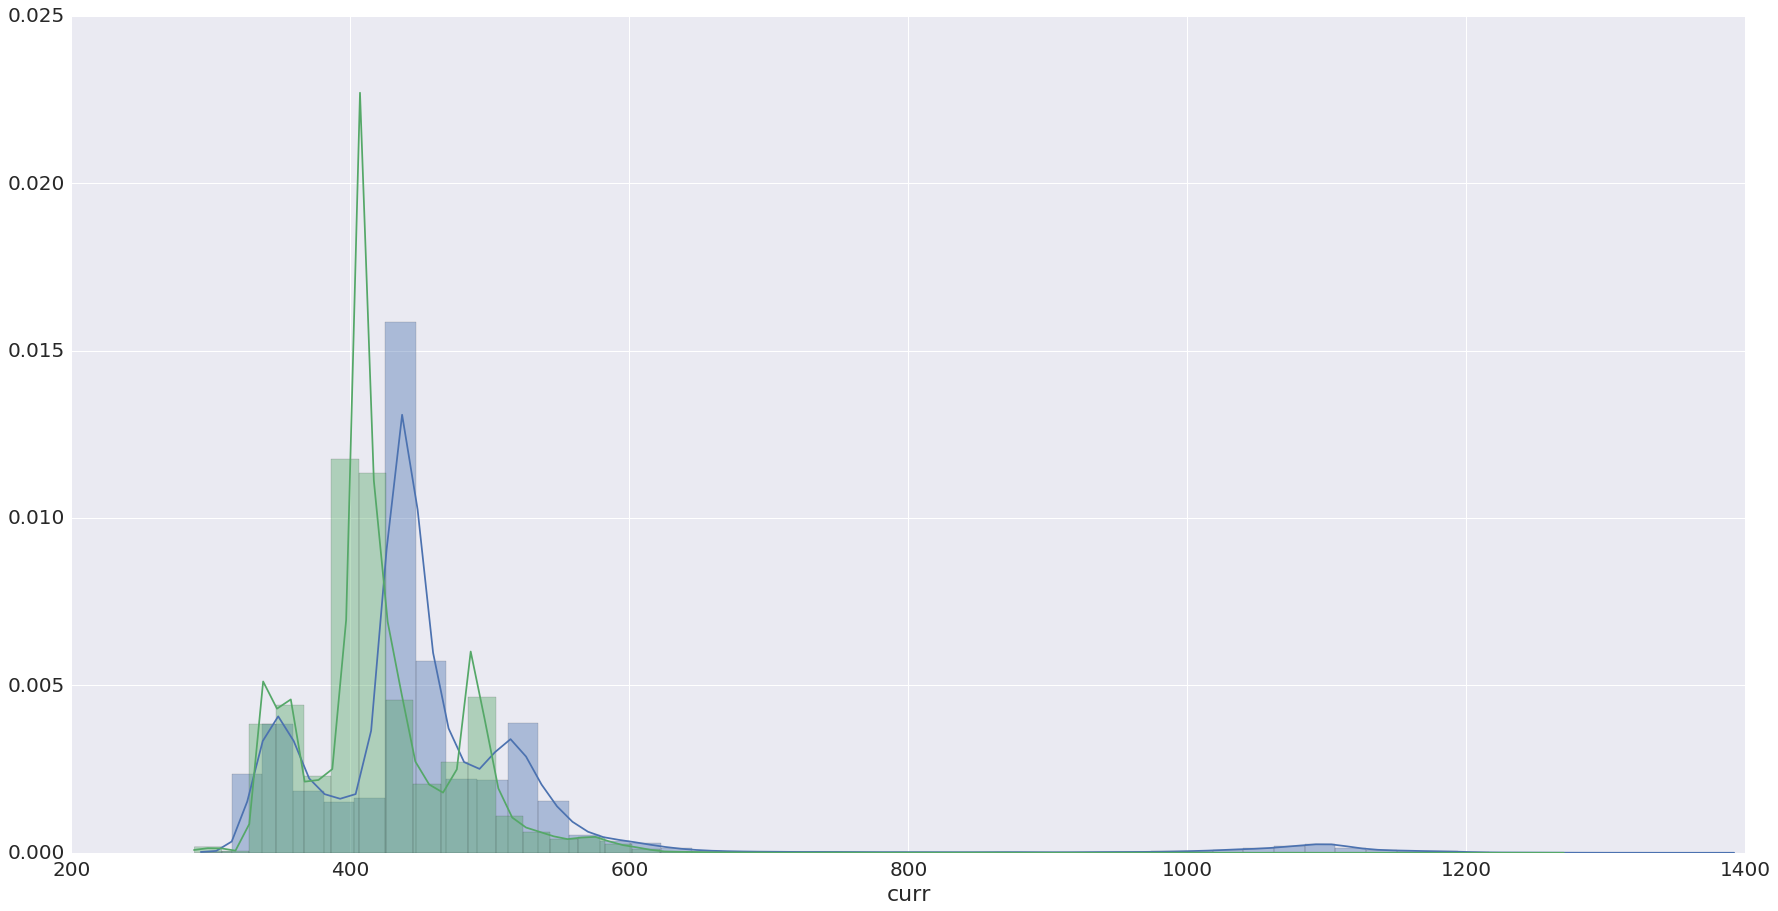

In [368]:
#distplot

sns.set(
    rc={"figure.figsize": (30, 15)},
    font_scale=2
)

for key, value in df_sorted.items():
    sns.distplot(value.curr, label=key, )

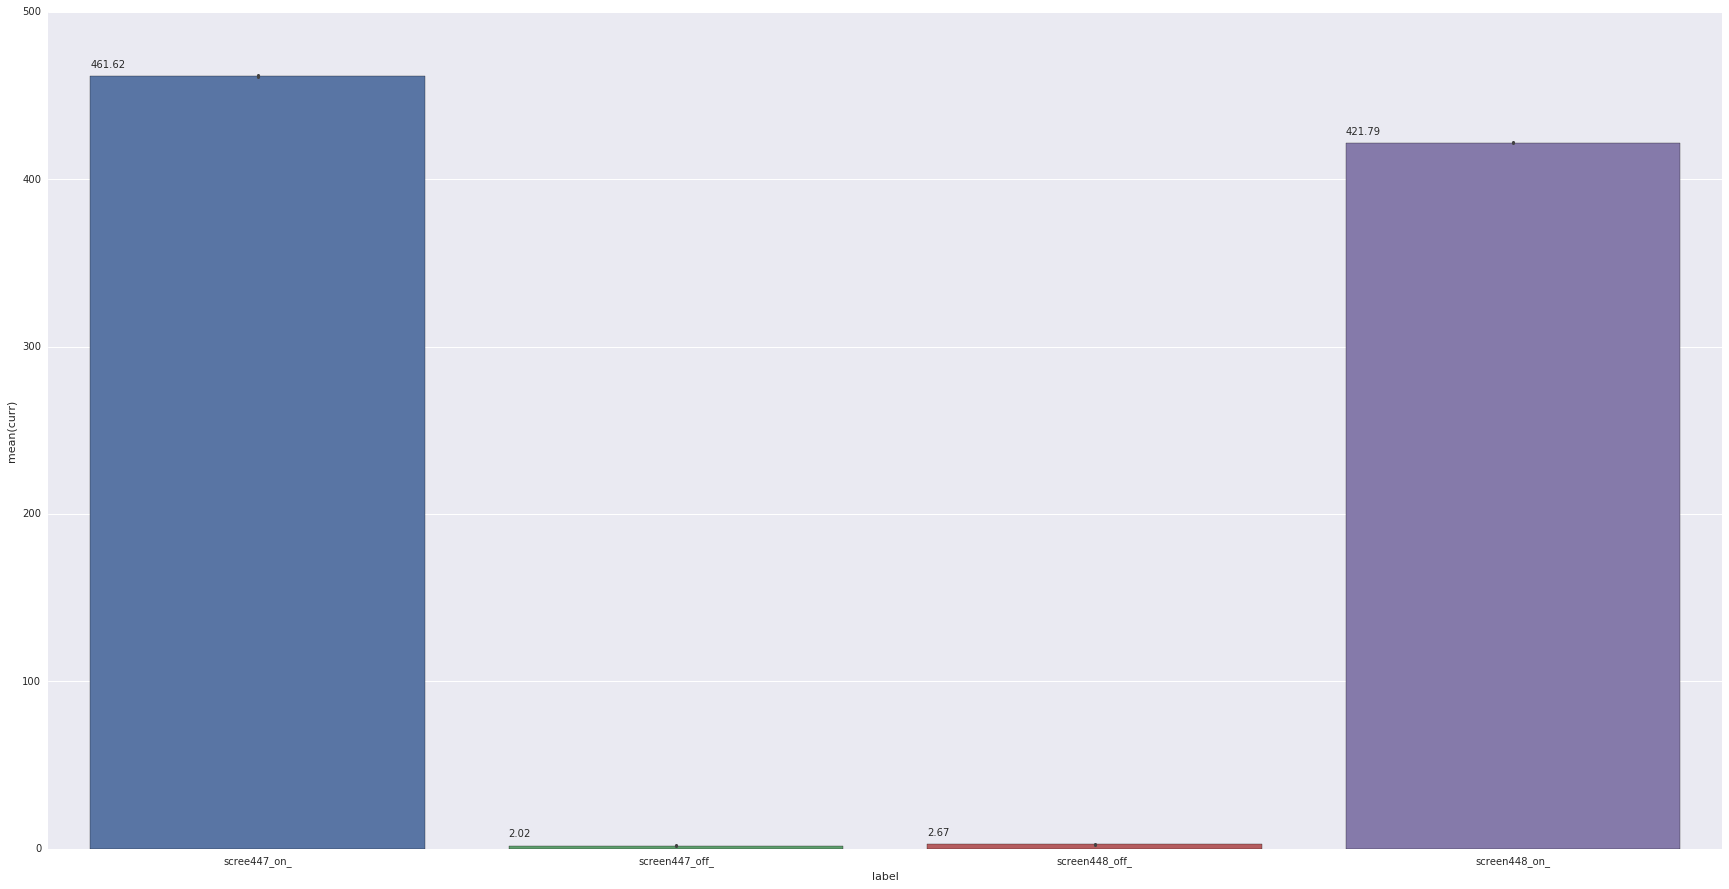

In [366]:
#barplot

df = None
for key, value in df_sorted.items():
    if df is None:
        df = value
    else:
        df = df.append(value)

sns.set(font_scale=1, rc={"figure.figsize": (30, 15)})
        
ax = sns.barplot(x=df.label, y=df.curr)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x(), height+5, '%1.2f' % (height) )


In [222]:
import scipy.stats as sts

In [ ]:
sts.mannwhitneyu(df_m.curr.values, df_nom.curr.values)

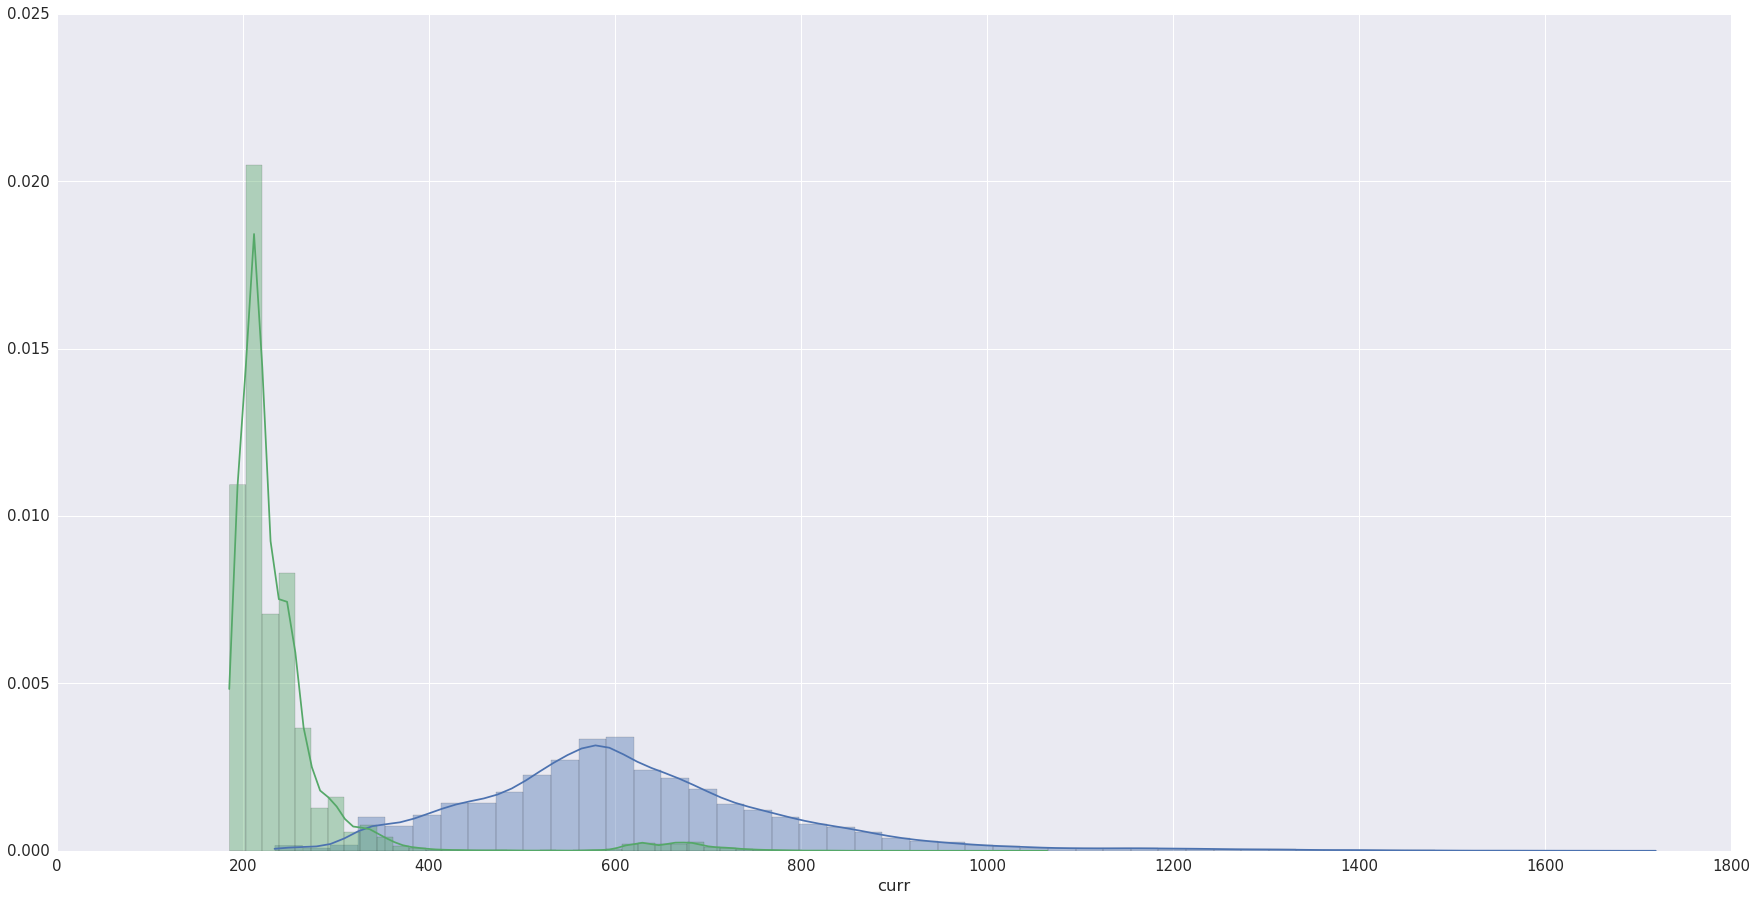

In [126]:
sns.distplot(df_m.curr, label="Maps")
sns.set(font_scale=1.5, rc={"figure.figsize": (20, 12)})
sns.distplot(df_nom.curr, label="No Maps")